In [2]:
import json

with open('data.json') as json_file:
    data_all = json.load(json_file)

In [3]:
article_title = []
article_author = []

article_flairs = []

article_date = []
article_comments = []
article_score = []
article_ups = []
article_downs = []
article_awards_received = []
article_upvote_ratio = []
article_allow_live_comments = []

for i in range(0, len(data_all)):
    article_title.append(data_all[i]['data']['title'])
    article_author.append(data_all[i]['data']['author'])
    article_ups.append(data_all[i]['data']['ups'])
    article_downs.append(data_all[i]['data']['downs'])
    article_flairs.append(data_all[i]['data']['link_flair_text'])
    article_date.append(data_all[i]['data']['created_utc'])
    article_comments.append(data_all[i]['data']['num_comments'])
    article_score.append(data_all[i]['data']['score'])
    article_awards_received.append(data_all[i]['data']['total_awards_received'])
    article_upvote_ratio.append(data_all[i]['data']['upvote_ratio'])
    article_allow_live_comments.append(data_all[i]['data']['allow_live_comments'])

In [4]:
# DATA QUALITY ASSISMENT
# find missing values/ odd values

unique = list(set(article_flairs))
print("number of unique values - " + str(len(unique)))
for x in unique:
    print(x)

missing_values = 0
for x in article_flairs:
    if(type(x)==None):
        missing_values = missing_values+1

print("number of missing values - "+ str(missing_values))

number of unique values - 17
Sports
Politics
Policy/Economy
Science/Technology
Photography
| Unverified Content / Disreputed Source |
Unverified
CAA-NRC-NPR
| Social Media Rules |
Coronavirus
Business/Finance
Non-Political
See Comments
| [OLD] Content |
Food
Scheduled
AskIndia
number of missing values - 0


In [5]:
# distribution of data among flairs - 
distribution = {}
for x in unique:
    distribution[x] = 0

{'Sports': 3, 'Politics': 233, 'Policy/Economy': 45, 'Science/Technology': 29, 'Photography': 10, '| Unverified Content / Disreputed Source |': 1, 'Unverified': 2, 'CAA-NRC-NPR': 7, '| Social Media Rules |': 1, 'Coronavirus': 246, 'Business/Finance': 23, 'Non-Political': 243, 'See Comments': 2, '| [OLD] Content |': 1, 'Food': 14, 'Scheduled': 15, 'AskIndia': 199}


<BarContainer object of 17 artists>

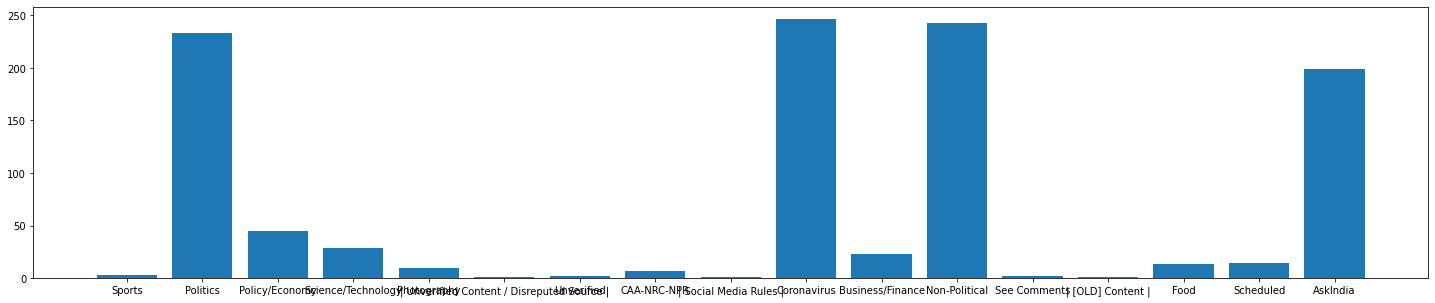

In [6]:
from matplotlib import pyplot as plt

for i in range(len(data_all)):
    distribution[article_flairs[i]] += 1
print(distribution)
plt.figure(figsize=(25,5))
plt.bar(distribution.keys(), distribution.values())

In [7]:
scoreVflair = {}
for x in unique:
    scoreVflair[x] = []

for i in range(len(data_all)):
    scoreVflair[article_flairs[i]].append(article_score[i])

print(scoreVflair)

{'Sports': [60, 189, 25], 'Politics': [347, 66, 82, 31, 244, 228, 38, 39, 25, 69, 54, 96, 18, 71, 12, 87, 93, 30, 512, 7, 8, 14, 80, 29, 6, 18, 321, 12, 26, 4, 4, 408, 12, 143, 1, 1, 0, 162, 0, 57, 96, 23, 63, 145, 38, 103, 111, 41, 85, 88, 15, 0, 250, 0, 53, 63, 149, 7, 14, 58, 56, 0, 106, 17, 56, 134, 0, 71, 23, 9, 14, 41, 364, 195, 1, 123, 308, 360, 63, 7, 249, 3, 118, 8, 113, 32, 60, 0, 4, 348, 105, 192, 26, 0, 2, 0, 39, 61, 50, 0, 82, 225, 18, 30, 149, 161, 37, 26, 85, 1, 4, 32, 53, 38, 104, 77, 6, 0, 10, 678, 8, 10, 21, 831, 200, 39, 11, 604, 552, 18, 6, 123, 27, 603, 371, 39, 7, 82, 0, 5, 352, 50, 3, 29, 18, 25, 155, 191, 0, 74, 40, 1, 0, 184, 1, 11, 53, 111, 6, 23, 24, 15, 357, 75, 37, 83, 241, 44, 229, 42, 26, 70, 51, 97, 18, 75, 12, 86, 8, 98, 9, 33, 516, 13, 78, 34, 6, 18, 320, 11, 27, 4, 5, 411, 11, 148, 1, 1, 0, 165, 0, 58, 96, 21, 60, 144, 39, 102, 106, 39, 84, 87, 14, 2, 253, 0, 56, 64, 149, 6, 14, 59, 56, 0, 108, 17, 61, 131, 0, 71, 23, 11, 13], 'Policy/Economy': [116, 

In [8]:
avg_score = {}
for x in unique:
    total = 0
    for y in scoreVflair[x]:
        total += y
    avg_score[x] = total/distribution[x]

avg_score

{'Sports': 91.33333333333333,
 'Politics': 87.37339055793991,
 'Policy/Economy': 41.44444444444444,
 'Science/Technology': 51.310344827586206,
 'Photography': 400.8,
 '| Unverified Content / Disreputed Source |': 4.0,
 'Unverified': 1897.0,
 'CAA-NRC-NPR': 155.42857142857142,
 '| Social Media Rules |': 388.0,
 'Coronavirus': 94.0040650406504,
 'Business/Finance': 68.0,
 'Non-Political': 136.69958847736626,
 'See Comments': 290.0,
 '| [OLD] Content |': 22.0,
 'Food': 148.71428571428572,
 'Scheduled': 41.666666666666664,
 'AskIndia': 26.753768844221106}

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4b2b34d250>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4b2b34dcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4b2b33ecd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4b2b3557d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4b2b355d10>,
 'means': []}

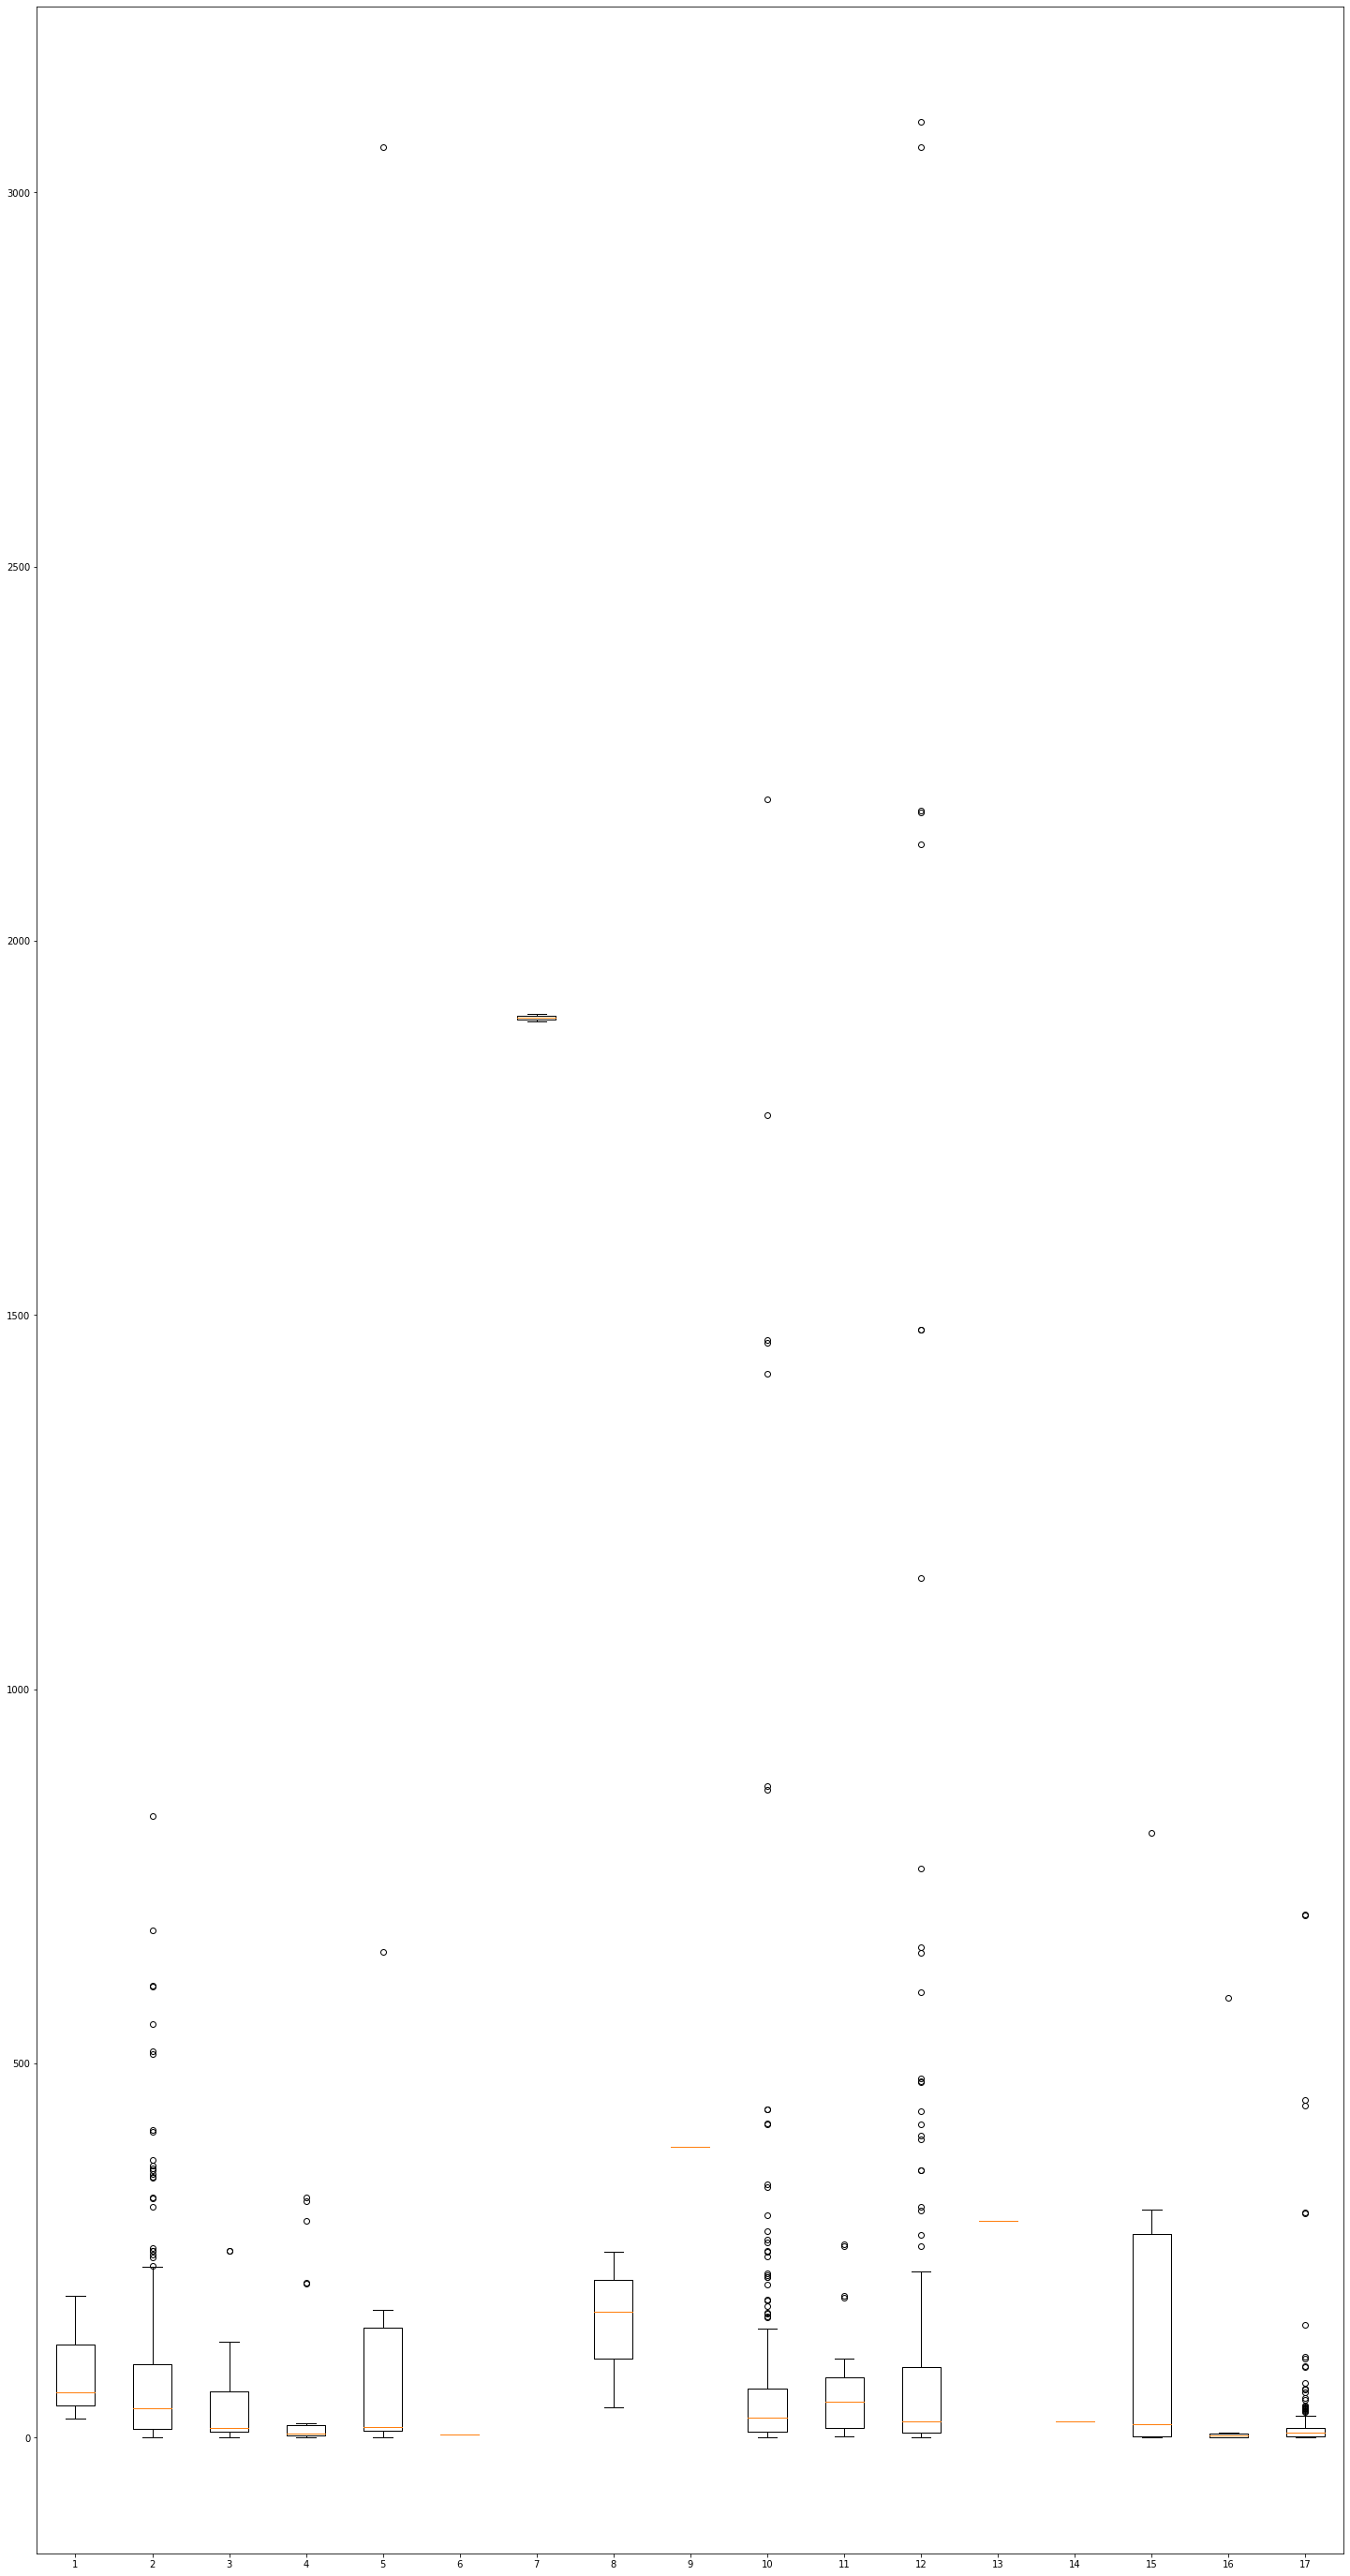

In [9]:
plt.figure(figsize=(25,50))
plt.boxplot(scoreVflair.values())

In [10]:
unique_authors = list(set(article_author))
len(unique_authors)

509

In [11]:
unique_allow_live_comments = list(set(article_allow_live_comments))
unique_allow_live_comments

[False, True]

In [13]:
f = open("data.csv", "a")
f.write('date,num_comments,score,awards,upvote_ratio,allow_comments,flairs')
f.write('\n')
for i in range(len(data_all)):
    if article_flairs[i] not in ["| Social Media Rules |", "| [OLD] Content |", "| Unverified Content / Disreputed Source |", "Unverified", "See Comments"]:
        ans = '{},{},{},{},{},{},{}'.format(article_date[i], article_comments[i], article_score[i], article_awards_received[i], article_upvote_ratio[i], article_allow_live_comments[i], article_flairs[i])
        f.write(ans)
        f.write('\n')
f.close()